# Ввод данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/HR.csv', on_bad_lines='skip')
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Статистика

In [3]:
def print_base_num_stats(num_data):
    min_ = num_data.min()
    max_ = num_data.max()
    range_ = (max_ - min_)
    disp = num_data.var()
    mean = num_data.mean()
    median = num_data.median()
    mode = num_data.mode()[0]
    print(f"Минимум {min_}", f"Максимум {max_}", f"Диапазон {range_}", f"Дисперсия {disp}",
          f"Среднее {mean}", f"Медиана {median}", f"Мода {mode}", sep='\n')

In [4]:
print_base_num_stats(df['satisfaction_level'])

Минимум 0.09
Максимум 1.0
Диапазон 0.91
Дисперсия 0.06181720064708763
Среднее 0.6128335222348156
Медиана 0.64
Мода 0.1


In [5]:
print_base_num_stats(df['last_evaluation'])

Минимум 0.36
Максимум 1.0
Диапазон 0.64
Дисперсия 0.02929886443156307
Среднее 0.7161017401160078
Медиана 0.72
Мода 0.55


In [6]:
print_base_num_stats(df['number_project'])

Минимум 2
Максимум 7
Диапазон 5
Дисперсия 1.519283914389243
Среднее 3.80305353690246
Медиана 4.0
Мода 4


In [7]:
print_base_num_stats(df['average_montly_hours'])

Минимум 96
Максимум 310
Диапазон 214
Дисперсия 2494.313174809956
Среднее 201.0503366891126
Медиана 200.0
Мода 135


In [8]:
print_base_num_stats(df['time_spend_company'])

Минимум 2
Максимум 10
Диапазон 8
Дисперсия 2.131997811722364
Среднее 3.498233215547703
Медиана 3.0
Мода 3


In [9]:
print_base_num_stats(df['Work_accident'])
print()
df['Work_accident'].value_counts(normalize = True)

Минимум 0
Максимум 1
Диапазон 1
Дисперсия 0.12370594008840931
Среднее 0.1446096406427095
Медиана 0.0
Мода 0



0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [10]:
print_base_num_stats(df['left'])
print()
df['left'].value_counts(normalize = True)

Минимум 0
Максимум 1
Диапазон 1
Дисперсия 0.18141133843291915
Среднее 0.2380825388359224
Медиана 0.0
Мода 0



0    0.761917
1    0.238083
Name: left, dtype: float64

In [11]:
print_base_num_stats(df['promotion_last_5years'])
print()
df['promotion_last_5years'].value_counts(normalize = True)

Минимум 0
Максимум 1
Диапазон 1
Дисперсия 0.02081714102094071
Среднее 0.021268084538969265
Медиана 0.0
Мода 0



0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

# Корреляционная матрица

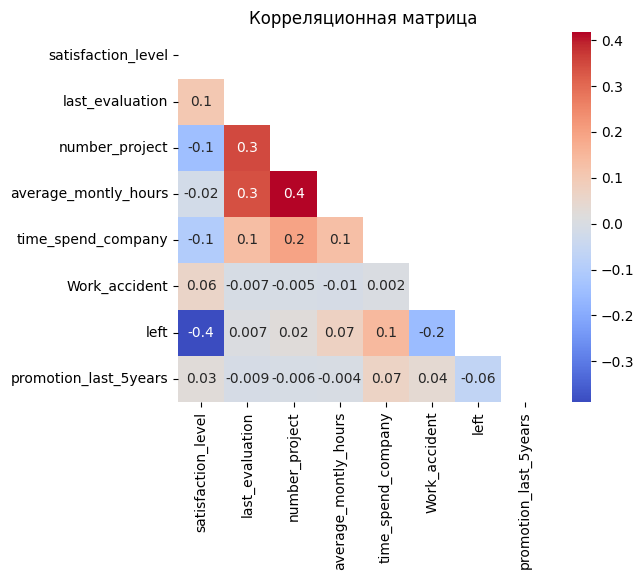

In [12]:
df_corr = df.loc[:, (df.columns !='department') & (df.columns !='salary')].corr()
matrix = np.triu(df_corr)

sns.heatmap(df_corr, annot = True,
            fmt='.1g', cmap= 'coolwarm', square=True, mask=matrix)
plt.title('Корреляционная матрица')
plt.show()

## Самые скоррелированные переменные
Среднее количество часов на рабочем месте и количество проектов, выполненных за время работы.

Первая величина относится к фиксированному периоду, когда как вторая -- относится ко всему периоду работы. Естественным образом можно предположить, что чем дольше человек работает, тем больше проектов он выполнил. Тем не менее, столь же сильной корреляции между числом проектов и стажем не наблюдается, что странно. Немного сильнее корреляции между числом проектов, временем с последней оценки и средним временем на рабочем месте. Скорее всего зависимость можно объяснить следующим образом. Чем больше проектов у работника, тем больше ему приходится работать ежемесячно и тем больше проектов будет выполнено по итогу (больше, даже в сравнии с коллегами с большим стажем).

## Самые обратно-скоррелированные переменные:
Уровень удовлетворенности и факт увольнения.
Здесь просто: если плохо -- уходи. Неудвлетворенность ведет к увольнению.

## Наименее скоррелированные переменные:
Факт наличия инцидента на рабочем месте и стаж.
Здесь аналогично первому пункту, можно заподозрить, что чем больше человек проработал, тем больше шанс случайно "застать" инцидент. Однако связи не наблюдается. Проишествия происходят не настолько часто, чтобы "старожилы" были бы с большим шансом застигнуты в расплох случайным проишествием, чем новички.
С другой стророны, 14 % респондентов так или иначе столкнулись с проишествием на работе, что немало. Если бы речь шла об опасном производстве, то на таком стаж бы помогал избегать неприятностей в дальнейшем, однако, как показано ниже, речь о рабочем предприятии не идет.

# Статистика по отделам

In [13]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Большинство опрошеных работают в отделе продаж, техническом отделе или отделе поддержки.

# Распределение по зарплате

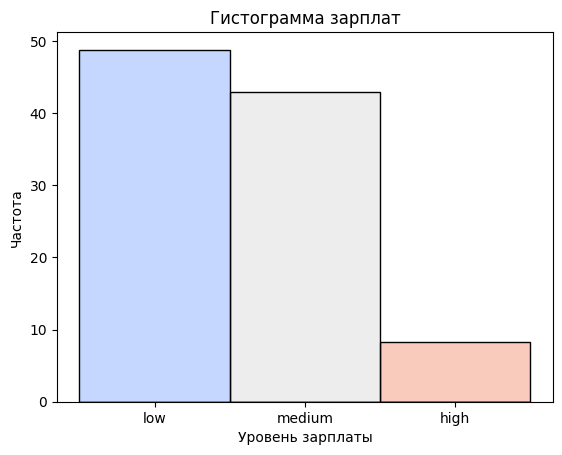

In [14]:
diverging_colors = sns.color_palette("RdBu", 3)
sns.histplot(stat='percent', x=df['salary'], hue=df['salary'], palette = 'coolwarm')
plt.legend([],[], frameon=False)

plt.title('Гистограмма зарплат')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Частота')
plt.show()

Почти пововина опрошеных имеют низкую зарплату

In [15]:
df_sales_salary_counts = df.loc[df['department'] == 'sales']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_sales_salary_counts['department'] = 'sales'
df_technical_salary_counts = df.loc[df['department'] == 'technical']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_technical_salary_counts['department'] = 'technical'
df_support_salary_counts = df.loc[df['department'] == 'support']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_support_salary_counts['department'] = 'support'
df_IT_salary_counts = df.loc[df['department'] == 'IT']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_IT_salary_counts['department'] = 'IT'
df_product_mng_salary_counts = df.loc[df['department'] == 'product_mng']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_product_mng_salary_counts['department'] = 'product_mng'
df_marketing_salary_counts = df.loc[df['department'] == 'marketing']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_marketing_salary_counts['department'] = 'marketing'
df_RandD_salary_counts = df.loc[df['department'] == 'RandD']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_RandD_salary_counts['department'] = 'RandD'
df_accounting_salary_counts = df.loc[df['department'] == 'accounting']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_accounting_salary_counts['department'] = 'accounting'
df_hr_salary_counts = df.loc[df['department'] == 'hr']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_hr_salary_counts['department'] = 'hr'
df_management_salary_counts = df.loc[df['department'] == 'management']['salary'].value_counts(normalize=True).rename_axis('salary').reset_index(name='percent')
df_management_salary_counts['department'] = 'management'

df_salary = pd.concat([df_sales_salary_counts, df_technical_salary_counts, df_support_salary_counts,
                       df_IT_salary_counts, df_product_mng_salary_counts, df_marketing_salary_counts,
                       df_RandD_salary_counts, df_accounting_salary_counts, df_hr_salary_counts,
                       df_management_salary_counts], ignore_index=True)


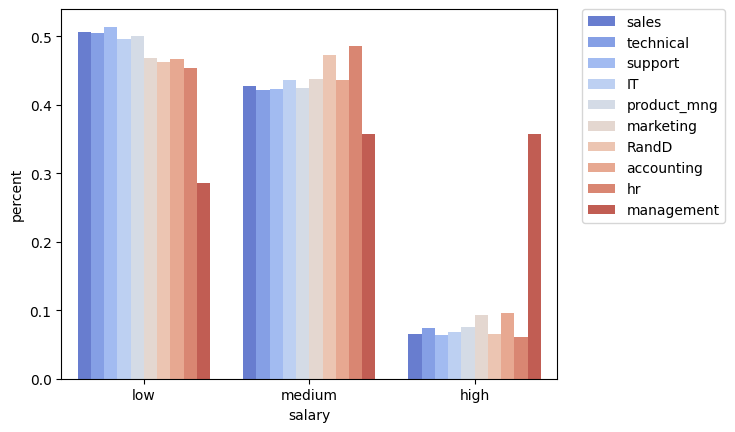

In [16]:
sns.barplot(x='salary', y='percent', hue='department', data=df_salary, palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

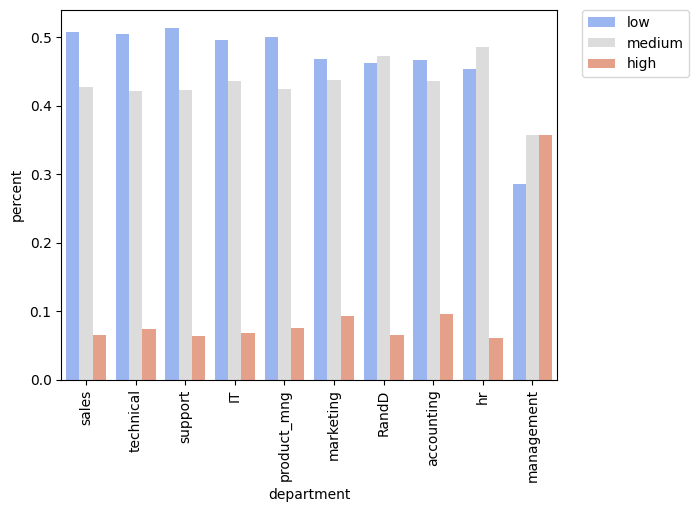

In [17]:
sns.barplot(x='department', y='percent', hue='salary', data=df_salary, palette='coolwarm')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Вывод: менеджмент много зарабатывает.

# Проверка гипотезы

Для наглядности приведена визуализация распределения времени на рабочем месте.

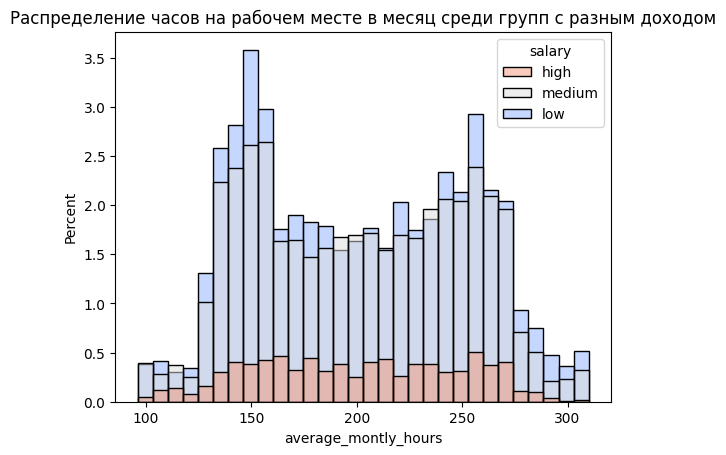

In [35]:
hue_order = ['high', 'medium', 'low']
palette = sns.color_palette('coolwarm', 3)

sns.histplot(stat='percent', x=df['average_montly_hours'], hue=df['salary'], palette = palette[-1::-1], hue_order=hue_order)
plt.title('Распределение часов на рабочем месте в месяц среди групп с разным доходом')
plt.show()

In [21]:
hour_low_av = df.loc[df['salary'] == 'low']['average_montly_hours'].mean()
hour_medium_av = df.loc[df['salary'] == 'medium']['average_montly_hours'].mean()
hour_high_av = df.loc[df['salary'] == 'high']['average_montly_hours'].mean()
hour_low_av

200.9965828321487

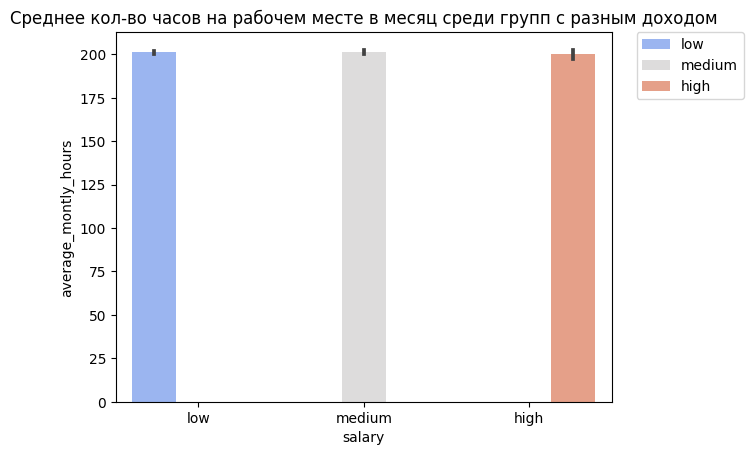

In [36]:
sns.barplot(x=df['salary'], hue=df['salary'], y=df['average_montly_hours'], palette = 'coolwarm')
plt.title('Среднее кол-во часов на рабочем месте в месяц среди групп с разным доходом')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Как видно, разница в среднем времени очень мала, что подтверждается статистически.

In [33]:
from scipy import stats

stat, p = stats.f_oneway(df.loc[df['salary'] == 'low']['average_montly_hours'], df.loc[df['salary'] == 'medium']['average_montly_hours'],
                         df.loc[df['salary'] == 'high']['average_montly_hours'])
if p < 0.05:
    print("Отклоняем нулевую гипотезу")
else:
    print("Не отклоняем нулевую гипотезу")

Не отклоняем нулевую гипотезу


Статистически значмой разницы в среднем времени на рабочем месте нет.

# Статистика среди уволившихся и неуволившихся сотрудников

In [50]:
def stat_left_noleft(data):
  print(f'''Доля сотрудников с повышением за последние 5 лет: {data['promotion_last_5years'].value_counts(normalize = True)[1]:.3f}
Средняя степень удовлетворенности: {data['satisfaction_level'].mean():.3f}
Среднее количество проектов: {data['number_project'].mean():.3f}''')

## Неуволившиеся сотрудники

In [51]:
noleft = df.loc[df['left'] == 0]
stat_left_noleft(noleft)

Доля сотрудников с повышением за последние 5 лет: 0.026
Средняя степень удовлетворенности: 0.667
Среднее количество проектов: 3.787


## Уволившиеся сотрудники

In [52]:
left = df.loc[df['left'] == 1]
stat_left_noleft(left)

Доля сотрудников с повышением за последние 5 лет: 0.005
Средняя степень удовлетворенности: 0.440
Среднее количество проектов: 3.856
